In [1]:
import pandas as pd

In [ ]:
age_changes_df = pd.read_csv("/home/eidf128/eidf128/stirkova_big_eidf/SPARK/age_changes.csv")
hist_adult_df = pd.read_csv("/home/eidf128/eidf128/stirkova_big_eidf/SPARK/background_history-adult.csv")
hist_child_df = pd.read_csv("/home/eidf128/eidf128/stirkova_big_eidf/SPARK/background_history-child.csv")
hist_sibl_df = pd.read_csv("/home/eidf128/eidf128/stirkova_big_eidf/SPARK/background_history-sibling.csv") 
basic_med_scr_df = pd.read_csv("/home/eidf128/eidf128/stirkova_big_eidf/SPARK/basic_medical_screening.csv", low_memory=False) # => use this

clin_lab_df = pd.read_csv("/home/eidf128/eidf128/stirkova_big_eidf/SPARK/clinical_lab_report.csv")

#  Developmental Coordination Disorder Questionnaire (DCDQ)
dcdq_df = pd.read_csv("/home/eidf128/eidf128/stirkova_big_eidf/SPARK/dcdq.csv")
# all ads = True

individuals_df = pd.read_csv("/home/eidf128/eidf128/stirkova_big_eidf/SPARK/individuals.csv")
# descriptive vars about participants such as sex, race, diagnosis (Autism Spectrum Disorder, Autism or Autistic Disorder, Asperger's Disorder, Other)


# Repetitive Behavior Scale-Revised (RBS-R)
rbsr_df = pd.read_csv("/home/eidf128/eidf128/stirkova_big_eidf/SPARK/rbs-r.csv")
roles_index_df = pd.read_csv("/home/eidf128/eidf128/stirkova_big_eidf/SPARK/roles_index.csv", low_memory=False)
# Social-Communication Questionnaire (csq)
scq_df = pd.read_csv("/home/eidf128/eidf128/stirkova_big_eidf/SPARK/scq.csv")



In [41]:
print("basic_med_scr_df shape:", basic_med_scr_df.shape)
print("dcdq_df shape:", dcdq_df.shape)
print("rbsr_df shape:", rbsr_df.shape)
print("scq_df shape:", scq_df.shape) # siblings only
print()
print("age_changes_df shape:", age_changes_df.shape)
print("hist_adult_df shape:", hist_adult_df.shape)
print("hist_child_df shape:", hist_child_df.shape)
print("hist_sibl_df shape:", hist_sibl_df.shape)
print("clin_lab_df shape:", clin_lab_df.shape)
print("individuals_df shape:", individuals_df.shape)
print("roles_index_df shape:", roles_index_df.shape)

basic_med_scr_df shape: (134213, 135)
dcdq_df shape: (24656, 35)
rbsr_df shape: (33572, 65)
scq_df shape: (63172, 55)

age_changes_df shape: (121, 2)
hist_adult_df shape: (2788, 122)
hist_child_df shape: (34373, 117)
hist_sibl_df shape: (14459, 40)
clin_lab_df shape: (521, 55)
individuals_df shape: (230936, 37)
roles_index_df shape: (90914, 33)


In [42]:
branching_features = ['dev_lang', 'dev_lang_dis', 'dev_ld', 'dev_motor', 'dev_mutism', 'dev_soc_prag', 'dev_speech', 
'attn_behav', 'behav_adhd', 'behav_conduct', 'behav_intermitt_explos', 'behav_odd', 
'mood_or_anx', 'mood_anx', 'mood_bipol', 'mood_dep', 'mood_dmd', 'mood_hoard', 'mood_ocd', 'mood_sep_anx', 'mood_soc_anx']

### Exploring branching features

In [43]:
features_dev = ['dev_lang', 'dev_lang_dis', 'dev_ld', 'dev_motor', 'dev_mutism', 'dev_soc_prag', 'dev_speech']
features_behav = ['attn_behav', 'behav_adhd', 'behav_conduct', 'behav_intermitt_explos', 'behav_odd']
features_mood = ['mood_or_anx', 'mood_anx', 'mood_bipol', 'mood_dep', 'mood_dmd', 'mood_hoard', 'mood_ocd', 'mood_sep_anx', 'mood_soc_anx']

dev_df = basic_med_scr_df[features_dev]
behav_df = basic_med_scr_df[features_behav]
mood_df = basic_med_scr_df[features_mood]

In [44]:
# df = dev_df
# cat = 'dev_lang'
df = behav_df
cat = 'attn_behav'
df = mood_df
cat = 'mood_or_anx'

filtered_dev_df = df[df[cat] == 1]
# filtered_dev_df = df[pd.isna(df[cat])]

# Step 2: Drop the 'dev_lang' column
filtered_dev_df_no_lang = filtered_dev_df.drop(columns=[cat])

# Step 3: Calculate the sum of all remaining columns for each row
row_sums = filtered_dev_df_no_lang.sum(axis=1)

print(row_sums.sum())
row_sums

84931.0


1         4.0
5         2.0
6         1.0
7         1.0
8         1.0
         ... 
134193    1.0
134202    2.0
134205    3.0
134211    2.0
134212    2.0
Length: 47727, dtype: float64

In [45]:
# for dev_df[dev_lang] == 1, there are some sums that are 0
# for dev_df[dev_lang] == 0, there are all sums are 0
# same for other two dfs

### Filtering data

In [46]:
# Records suspected of containing invalid data reported by parents are
# indicated by the basic_medical_measure_validity flag value of 1. This
# includes individuals reporting multiple incompatible diagnoses, and infants
# reported to have psychiatric diagnoses.

# remove invalid info
basic_med_scr_df = basic_med_scr_df[basic_med_scr_df['basic_medical_measure_validity_flag'] != 1]

# only keep columns with at most x% missing data
percentage_missing = 80
missing_threshold = len(basic_med_scr_df) * (1 - percentage_missing/100)
basic_med_scr_df_small = basic_med_scr_df.dropna(thresh=missing_threshold, axis=1)
print("basic_med_scr_df shape:", basic_med_scr_df.shape)
print("basic_med_scr_df_small shape:", basic_med_scr_df_small.shape)


basic_med_scr_df shape: (134048, 135)
basic_med_scr_df_small shape: (134048, 25)


In [47]:
columns_subset = basic_med_scr_df_small.columns.to_list()
print(columns_subset)

['subject_sp_id', 'respondent_sp_id', 'family_id', 'biomother_id', 'biofather_id', 'sex', 'depend_adult', 'asd', 'age_at_eval_months', 'age_at_eval_years', 'attn_behav', 'behav_adhd', 'birth_oth_calc', 'dev_lang', 'dev_lang_dis', 'gen_dx_oth_calc_self_report', 'gen_test', 'gen_test_oth_calc', 'growth_oth_calc', 'mood_anx', 'mood_or_anx', 'neuro_oth_calc', 'prev_study_oth_calc', 'psych_oth_calc', 'eval_year']


In [48]:
# Adding in the branching features, convert to set to remove duplicates
basic_med_scr_df_small = basic_med_scr_df[list(set(branching_features + columns_subset))]
basic_med_scr_df_small

,birth_oth_calc,attn_behav,psych_oth_calc,sex,dev_speech,mood_dmd,mood_hoard,biofather_id,mood_anx,respondent_sp_id,...,mood_bipol,growth_oth_calc,mood_or_anx,age_at_eval_years,gen_dx_oth_calc_self_report,gen_test,asd,subject_sp_id,behav_intermitt_explos,mood_sep_anx
0,0,1.0,0,Male,NaN,NaN,NaN,NaN,NaN,SP0000002,...,NaN,0,NaN,10,0,1.0,True,SP0000003,NaN,NaN
1,0,1.0,0,Female,NaN,NaN,NaN,NaN,1.0,SP0000002,...,1.0,0,1.0,30,0,1.0,False,SP0000002,NaN,NaN
2,0,NaN,0,Female,NaN,NaN,NaN,NaN,NaN,SP0000010,...,NaN,0,NaN,37,0,1.0,False,SP0000010,NaN,NaN
3,0,1.0,0,Male,NaN,NaN,NaN,NaN,NaN,SP0000010,...,NaN,0,NaN,14,0,1.0,True,SP0000013,NaN,NaN
4,0,NaN,0,Male,NaN,NaN,NaN,NaN,NaN,SP0000017,...,NaN,0,NaN,50,0,0.0,True,SP0000017,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134208,0,NaN,0,Female,NaN,NaN,NaN,NaN,NaN,SP0390283,...,NaN,0,NaN,0,0,0.0,False,SP0390285,NaN,NaN
134209,0,NaN,0,Male,NaN,NaN,NaN,NaN,NaN,SP0390283,...,NaN,0,NaN,1,0,0.0,True,SP0390284,NaN,NaN
134210,0,NaN,0,Female,NaN,NaN,NaN,NaN,NaN,SP0390283,...,NaN,0,NaN,29,0,0.0,False,SP0390283,NaN,NaN
134211,0,1.0,0,Female,NaN,NaN,NaN,NaN,NaN,SP0323183,...,1.0,0,1.0,26,0,0.0,True,SP0323183,NaN,NaN


In [49]:
# print(nan_percentage_no_asd)
# Iterate through each column in the DataFrame
for column in basic_med_scr_df_small.columns:
    # Calculate the percentage of NaN values for patients with ASD
    nan_percentage_asd = basic_med_scr_df_small[basic_med_scr_df_small['asd'] == True][column].isna().mean() * 100
    # Calculate the percentage of NaN values for patients without ASD
    nan_percentage_no_asd = basic_med_scr_df_small[basic_med_scr_df_small['asd'] == False][column].isna().mean() * 100
    
    # Print the percentages for the current column
    print(f"{column}: ASD - {nan_percentage_asd:.2f}% | No ASD - {nan_percentage_no_asd:.2f}%")


birth_oth_calc: ASD - 0.00% | No ASD - 0.00%
attn_behav: ASD - 55.63% | No ASD - 87.40%
psych_oth_calc: ASD - 0.00% | No ASD - 0.00%
sex: ASD - 0.00% | No ASD - 0.00%
dev_speech: ASD - 73.21% | No ASD - 97.06%
mood_dmd: ASD - 96.99% | No ASD - 99.81%
mood_hoard: ASD - 98.10% | No ASD - 99.57%
biofather_id: ASD - 49.62% | No ASD - 83.95%
mood_anx: ASD - 77.90% | No ASD - 79.50%
respondent_sp_id: ASD - 0.00% | No ASD - 0.00%
eval_year: ASD - 0.00% | No ASD - 0.00%
mood_ocd: ASD - 89.68% | No ASD - 96.03%
dev_motor: ASD - 82.16% | No ASD - 99.09%
mood_soc_anx: ASD - 88.19% | No ASD - 93.58%
dev_ld: ASD - 76.06% | No ASD - 96.77%
gen_test_oth_calc: ASD - 0.00% | No ASD - 0.00%
dev_soc_prag: ASD - 81.56% | No ASD - 99.72%
dev_lang_dis: ASD - 47.35% | No ASD - 96.78%
mood_dep: ASD - 89.00% | No ASD - 79.00%
family_id: ASD - 0.00% | No ASD - 0.00%
biomother_id: ASD - 11.92% | No ASD - 74.81%
depend_adult: ASD - 0.00% | No ASD - 0.00%
dev_mutism: ASD - 98.76% | No ASD - 99.93%
prev_study_oth_c

In [50]:

# med_scr_important_cols = ['subject_sp_id', 'respondent_sp_id', 'family_id', 'biomother_id',
#        'biofather_id', 'sex', 'asd', 'age_at_eval_months',
#        'age_at_eval_years', 'attn_behav', 'behav_adhd', 'birth_oth_calc',
#        'dev_lang', 'dev_lang_dis', 'gen_dx_oth_calc_self_report', 'gen_test',
#        'gen_test_oth_calc', 'growth_oth_calc', 'mood_anx', 'mood_or_anx',
#        'neuro_oth_calc', 'prev_study_oth_calc', 'psych_oth_calc']

# all_columns = ['attn_behav', 'mood_ocd', 'family_id', 'asd', 'behav_conduct',
#        'biomother_id', 'gen_test', 'mood_bipol', 'behav_adhd', 'behav_odd',
#        'dev_lang', 'birth_oth_calc', 'mood_soc_anx', 'psych_oth_calc',
#        'eval_year', 'dev_mutism', 'neuro_oth_calc',
#        'gen_dx_oth_calc_self_report', 'prev_study_oth_calc', 'sex', 'mood_anx',
#        'growth_oth_calc', 'dev_soc_prag', 'mood_or_anx', 'age_at_eval_years',
#        'mood_hoard', 'dev_lang_dis', 'respondent_sp_id', 'biofather_id',
#        'depend_adult', 'mood_dep', 'mood_dmd', 'dev_motor',
#        'age_at_eval_months', 'dev_speech', 'behav_intermitt_explos', 'dev_ld',
#        'gen_test_oth_calc', 'mood_sep_anx', 'subject_sp_id']

# possibly_important_cols = ['birth_oth_calc', 'gen_test_oth_calc', 'growth_oth_calc', 'neuro_oth_calc', 'psych_oth_calc', 'gen_dx_oth_calc_self_report']
not_important_cols = ['prev_study_oth_calc', 'gen_test', 'gen_test_oth_calc', 'growth_oth_calc', 
                      'age_at_eval_months', 'age_at_eval_years', 'eval_year', 'depend_adult']

# drop columns that don't seem meaningful
basic_med_scr_df_small = basic_med_scr_df_small.drop(columns=not_important_cols)

columns_not_for_imputation = ['subject_sp_id', 'respondent_sp_id', 'family_id', 'biomother_id', 'biofather_id', 'sex', 'asd']

# Missing values imputation
columns_to_impute = [col for col in basic_med_scr_df_small.columns if col not in columns_not_for_imputation]
basic_med_scr_df_small[columns_to_impute] = basic_med_scr_df_small[columns_to_impute].fillna(0)



In [51]:
# remove invalid info
individuals_df= individuals_df[(individuals_df['age_validity_flag'] != 1) & (individuals_df['individual_data_validity'] != 1)]


In [52]:
race_columns = ['asd', 'race_asian', 'race_african_amer', 'race_native_amer', 'race_native_hawaiian', 'race_white', 'race_other', 'hispanic']


In [53]:
race_df = med_scr_individuals_df[race_columns]

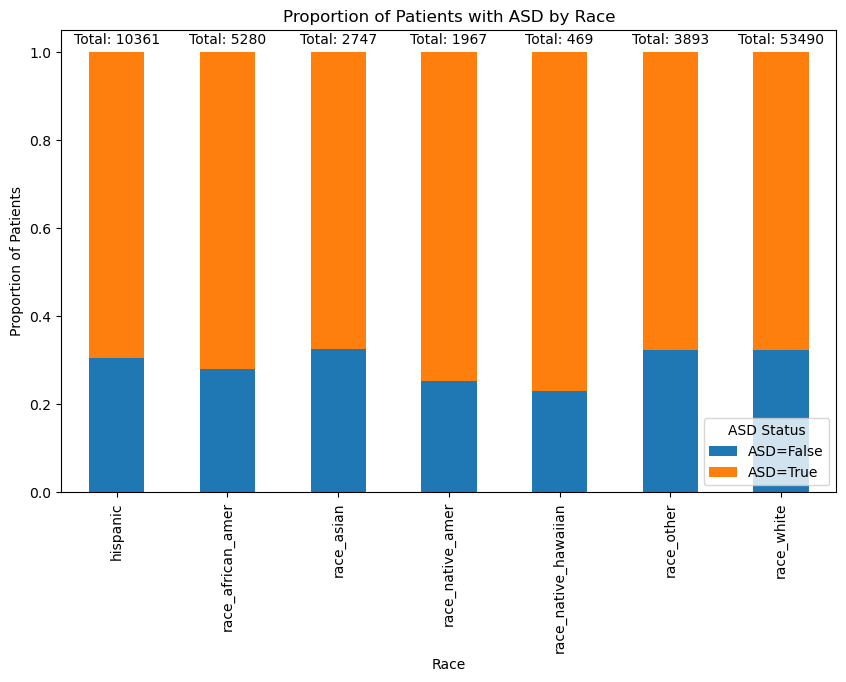

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming race_df is your DataFrame and it includes columns like 'some_race1', 'some_race2', ..., 'asd'

# Step 1: Melt the DataFrame
# race_columns = [col for col in race_df.columns if 'race' in col]  # Adjust based on your actual race column names
race_columns = ['race_asian', 'race_african_amer', 'race_native_amer', 'race_native_hawaiian', 'race_white', 'race_other', 'hispanic']

melted_df = race_df.melt(id_vars='asd', value_vars=race_columns, var_name='race', value_name='is_from_race')

# Step 2: Filter for positive cases
filtered_df = melted_df[melted_df['is_from_race'] == 1]

# Step 3: Group and count
grouped = filtered_df.groupby(['race', 'asd']).size().reset_index(name='count')

# Step 4: Pivot for easier calculation of proportions
pivot_df = grouped.pivot(index='race', columns='asd', values='count').fillna(0)

# Calculate proportions
pivot_df['total'] = pivot_df.sum(axis=1)
for col in pivot_df.columns[:-1]:  # Exclude the total column
    pivot_df[col] = pivot_df[col] / pivot_df['total']

# Step 5: Plotting
pivot_df.drop(columns='total').plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])
plt.xlabel('Race')
plt.ylabel('Proportion of Patients')
plt.title('Proportion of Patients with ASD by Race')
plt.legend(['ASD=False', 'ASD=True'], title='ASD Status', loc='lower right')

# Annotate Total Counts
for i, total in enumerate(pivot_df['total']):
    plt.text(i, 1.02, f'Total: {int(total)}', ha='center')

# plt.tight_layout()

NameError: name 'np' is not defined

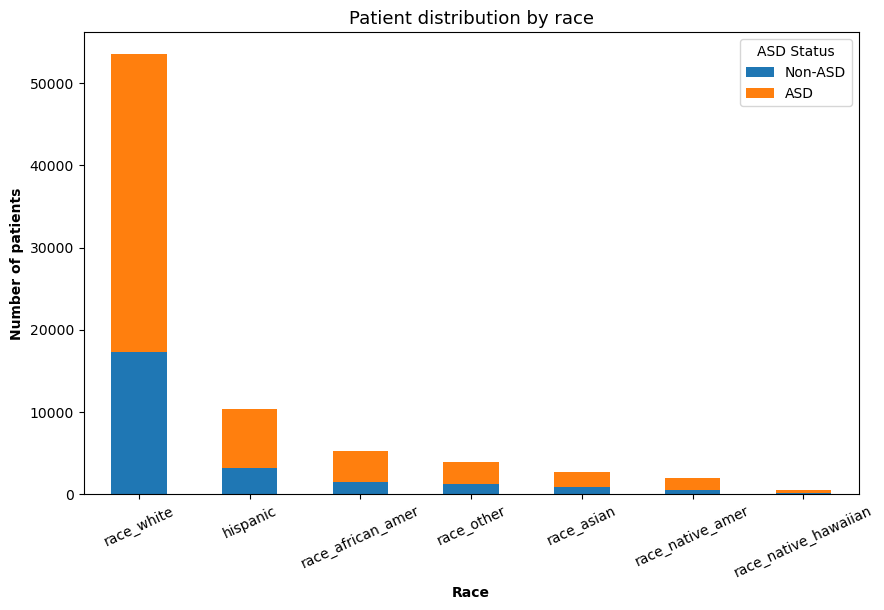

In [55]:
# Step 1: Melt the DataFrame
# race_columns = [col for col in race_df.columns if 'race' in col]  # Adjust based on your actual race column names
race_columns = ['race_asian', 'race_african_amer', 'race_native_amer', 'race_native_hawaiian', 'race_white', 'race_other', 'hispanic']

melted_df = race_df.melt(id_vars='asd', value_vars=race_columns, var_name='race', value_name='is_from_race')

# Step 2: Filter for positive cases
filtered_df = melted_df[melted_df['is_from_race'] == 1]

# Step 3: Group and count
grouped = filtered_df.groupby(['race', 'asd']).size().reset_index(name='count')

# Assuming the previous steps have been completed

# New Step: Sum counts for each race and sort in descending order
total_counts = grouped.groupby('race')['count'].sum().sort_values(ascending=False)

# Step 4: Pivot for absolute values (modified to use sorted index)
pivot_df = grouped.pivot(index='race', columns='asd', values='count').reindex(total_counts.index).fillna(0)
# Step 5: Plotting with Absolute Values
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])
plt.xlabel('Race', fontweight='bold')
plt.ylabel('Number of patients', fontweight='bold')
plt.title('Patient distribution by race', fontsize=13)
# plt.title('Patient distribution by race', fontweight='bold')
# plt.legend(['ASD=False', 'ASD=True'], title='ASD Status')
plt.legend(['Non-ASD', 'ASD'], title='ASD Status')
plt.xticks(rotation=25)

labels_list = ['White', 'Hispanic', 'African American', 'Other', 'Asian', 'Native American', 'Native Hawaiian'] 
plt.xticks(np.arange(len(race_columns)), labels_list)



plt.tight_layout()
plt.savefig('./figures/patient_distribution_race.pdf')

In [ ]:
individuals_df

,subject_sp_id,family_id,biomother_id,biofather_id,sex,asd,enrolled_multiple,multiple_birth,depend_adult,age_at_registration_months,...,language_level,referral,race_asian,race_african_amer,race_native_amer,race_native_hawaiian,race_white,race_other,hispanic,race_more_than_one_calc
0,SP0000003,SF0000003,SP0000002,NaN,Male,True,NaN,No,False,123.0,...,No words/does not speak,A clinical site,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0
1,SP0000002,SF0000003,NaN,NaN,Female,False,NaN,NaN,False,369.0,...,NaN,A clinical site,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SP0000013,SF0000013,SP0000010,NaN,Male,True,NaN,No,False,168.0,...,Uses longer sentences of his/her own and is ab...,A clinical site,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,SP0000010,SF0000013,NaN,NaN,Female,False,NaN,NaN,False,452.0,...,NaN,A clinical site,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SP0000017,SF0000017,NaN,NaN,Male,True,NaN,NaN,False,611.0,...,NaN,A clinical site,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230931,SP0390326,SF0390324,SP0390323,NaN,Male,False,NaN,NaN,False,74.0,...,NaN,A clinical site,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0
230932,SP0390325,SF0390324,SP0390323,NaN,Male,True,NaN,NaN,False,94.0,...,Uses longer sentences of his/her own and is ab...,A clinical site,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0
230933,SP0390324,SF0390324,SP0390323,NaN,Male,True,NaN,NaN,False,119.0,...,Uses longer sentences of his/her own and is ab...,A clinical site,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0
230934,SP0390328,SF0390329,NaN,NaN,Female,False,NaN,NaN,False,665.0,...,NaN,"Online (web page, Facebook or other social med...",NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [ ]:

individuals_important_cols = ['subject_sp_id', 'family_id', 'biomother_id', 'biofather_id', 'sex',
       'asd', 'multiple_birth','diagnosis_age', 'diagnosis','cognitive_impairment', 
       'language_level', 'race_asian','race_african_amer', 'race_native_amer', 'race_native_hawaiian',
       'race_white', 'race_other', 'hispanic']

# manually select only relevant colums (e.g. diagnosis source is dropped)
individuals_df_small = individuals_df[individuals_important_cols]

# drop columns that are only relevant for asd
asd_only_columns = ['diagnosis_age', 'diagnosis','cognitive_impairment', 'language_level']
individuals_df_small = individuals_df_small.drop(columns=asd_only_columns)


# Missing values imputation
race_columns = ['race_asian', 'race_african_amer', 'race_native_amer', 'race_native_hawaiian', 'race_white', 'race_other', 'hispanic']
individuals_df_small[race_columns] = individuals_df_small[race_columns].fillna(0)
individuals_df_small['multiple_birth'] = individuals_df_small['multiple_birth'].fillna("No")



# turn multiple_birth variable into numeric variable with 0 is No and 1 if Twin or Triplet
individuals_df_small['multiple_birth'] = individuals_df_small['multiple_birth'].map(lambda x: 0 if x == "No" else 1)



In [ ]:
common_fields = basic_med_scr_df_small.columns.intersection(individuals_df_small.columns).tolist()
print(common_fields)

['sex', 'biofather_id', 'family_id', 'biomother_id', 'asd', 'subject_sp_id']


In [ ]:
print("individuals_df_small before merge:", individuals_df_small.shape)
print("basic_med_scr_df_small before merge:", basic_med_scr_df_small.shape)

med_scr_individuals_df = basic_med_scr_df_small.merge(individuals_df_small, on=common_fields, how='inner')
print("med_scr_individuals_df shape:", med_scr_individuals_df.shape)

individuals_df_small before merge: (226808, 14)
basic_med_scr_df_small before merge: (134048, 32)
med_scr_individuals_df shape: (131811, 40)


In [35]:

# Convert variables to numeric
med_scr_individuals_df['asd'] = med_scr_individuals_df['asd'].map(lambda x: 1 if x == True else 0)
med_scr_individuals_df['sex'] = med_scr_individuals_df['sex'].map(lambda x: 1 if x == "Male" else 0)

In [36]:
med_scr_individuals_df['asd']

0         1
1         0
2         0
3         1
4         1
         ..
131806    0
131807    1
131808    0
131809    1
131810    1
Name: asd, Length: 131811, dtype: int64

In [37]:
med_scr_individuals_df.columns
# id_cols = ['respondent_sp_id', 'family_id', 'biomother_id','biofather_id']
# df = med_scr_individuals_df.drop(id_cols, axis=1)

Index(['birth_oth_calc', 'attn_behav', 'psych_oth_calc', 'sex', 'dev_speech',
       'mood_dmd', 'mood_hoard', 'biofather_id', 'mood_anx',
       'respondent_sp_id', 'mood_ocd', 'dev_motor', 'mood_soc_anx', 'dev_ld',
       'dev_soc_prag', 'dev_lang_dis', 'mood_dep', 'family_id', 'biomother_id',
       'dev_mutism', 'behav_conduct', 'dev_lang', 'behav_adhd', 'behav_odd',
       'neuro_oth_calc', 'mood_bipol', 'mood_or_anx',
       'gen_dx_oth_calc_self_report', 'asd', 'subject_sp_id',
       'behav_intermitt_explos', 'mood_sep_anx', 'multiple_birth',
       'race_asian', 'race_african_amer', 'race_native_amer',
       'race_native_hawaiian', 'race_white', 'race_other', 'hispanic'],
      dtype='object')

In [38]:
# med_scr_individuals_df.to_csv('spark_cleaned_data_more_features.csv', index=False)